In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load data

In [2]:
df = pd.read_csv('../data/house_price/train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
df = df[['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice']]

In [4]:
df

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,Wd Shng,140000
4,NoRidge,VinylSd,VinylSd,250000
...,...,...,...,...
1455,Gilbert,VinylSd,VinylSd,175000
1456,NWAmes,Plywood,Plywood,210000
1457,Crawfor,CemntBd,CmentBd,266500
1458,NAmes,MetalSd,MetalSd,142125


# Explore data

In [5]:
for col in df.columns:
    print(col, ':', len(df[col].unique()), 'labels')

Neighborhood : 25 labels
Exterior1st : 15 labels
Exterior2nd : 16 labels
SalePrice : 663 labels


In [6]:
df['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

Neighborhood : 25 labels


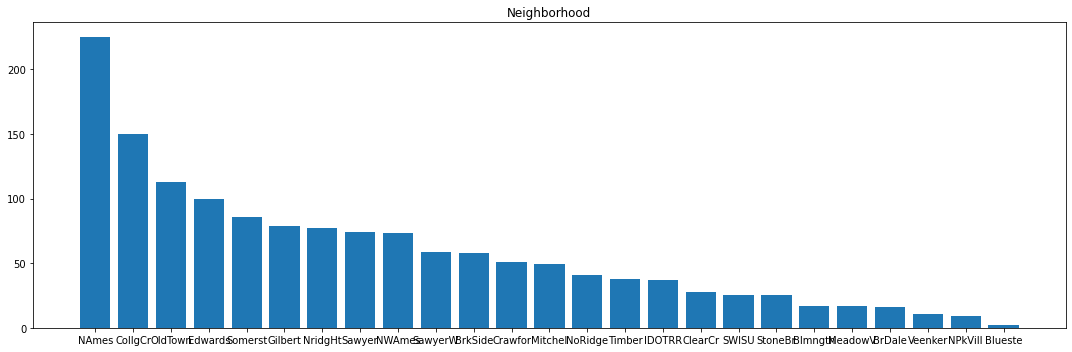

Exterior1st : 15 labels


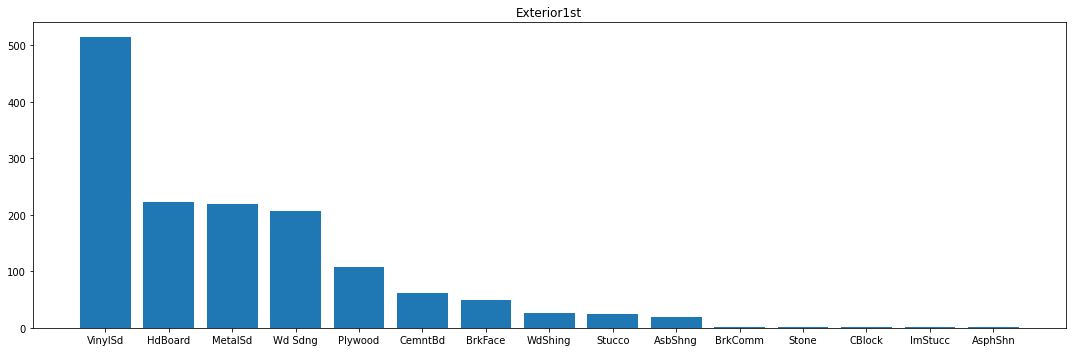

Exterior2nd : 16 labels


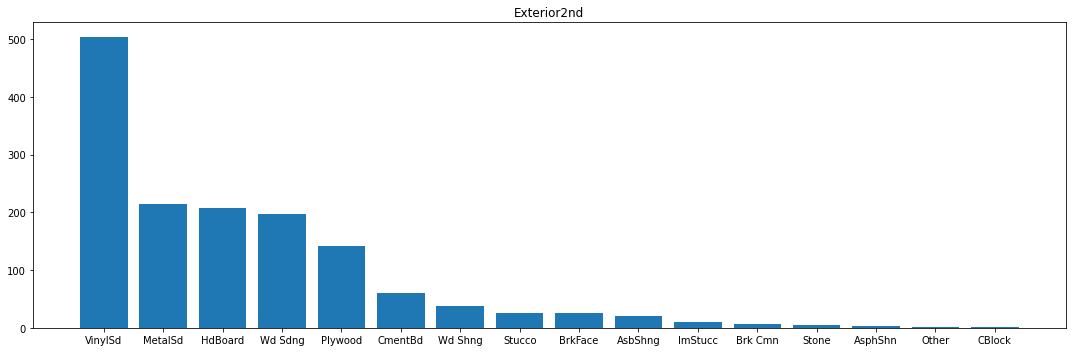

In [7]:
for col in df.drop('SalePrice', axis=1).columns:
    print(col, ':', len(df[col].unique()), 'labels')
    plt.subplots(figsize=(15, 5))
    plt.bar(df[col].value_counts().index, 
            df[col].value_counts())
    plt.title(col)
    plt.tight_layout()
    plt.show()

# Split data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    df[['Neighborhood', 'Exterior1st', 'Exterior2nd']],
    df['SalePrice'],
    test_size=0.3,
    random_state=0)

# Find top categories

In [9]:
pd.concat([X_train['Neighborhood'].value_counts(), 
           X_train['Neighborhood'].value_counts()/len(df)*100], 
          keys=['count', 'percent'], axis=1)

,count,percent
NAmes,151,10.342466
CollgCr,105,7.191781
OldTown,73,5.000000
Edwards,71,4.863014
Sawyer,61,4.178082
Somerst,56,3.835616
Gilbert,55,3.767123
NridgHt,51,3.493151
NWAmes,51,3.493151
SawyerW,45,3.082192
